# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is a practice of writing algorithms which can discover patterns in visual data. Such as the camera of a self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza & steak) using the image data modification notebook: https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

**Note:** We start with a smaller dataset so we can experiment quickly and figure out what works (or better yet wahat doesn't work) before scaling up.

In [1]:
# import zipfile

# Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_steak.zip")
# zip_ref.extractall()
# zip_ref.close()

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project... this usually means visualizing many samples of your data.

In [2]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak\test'.
There are 0 directories and 250 images in 'pizza_steak\test\pizza'.
There are 0 directories and 250 images in 'pizza_steak\test\steak'.
There are 2 directories and 0 images in 'pizza_steak\train'.
There are 0 directories and 750 images in 'pizza_steak\train\pizza'.
There are 0 directories and 750 images in 'pizza_steak\train\steak'.


In [3]:
# Another way to find out how many images are in a folder
num_steak_images_train = len(os.listdir("pizza_steak/train/steak/"))
print(num_steak_images_train)

750


To visualize our images, first let's get the class names programmatically.

In [4]:
# Get the classnames programmatically
import pathlib
import numpy as np

data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))  # Created a list of class_names from the subdirectories.
print(class_names)

['pizza' 'steak']


In [5]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
    # Set the target directory (we'll view images from here)
    target_folder = target_dir + target_class

    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)

    # Read in the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"Image shape: {img.shape}")  # show the shape of the image

    return img

Image shape: (512, 512, 3)


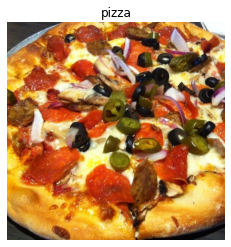

In [6]:
# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

In [7]:
# The images we've imported and plotted are actually giant arrays/tensors of different pixel values
import tensorflow as tf

tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[ 64,  60,  51],
        [ 65,  61,  52],
        [ 66,  61,  55],
        ...,
        [250, 254, 255],
        [250, 254, 255],
        [250, 254, 255]],

       [[ 68,  64,  55],
        [ 67,  63,  54],
        [ 65,  60,  54],
        ...,
        [250, 254, 255],
        [250, 254, 255],
        [250, 254, 255]],

       [[ 67,  64,  55],
        [ 64,  61,  52],
        [ 60,  57,  50],
        ...,
        [250, 254, 255],
        [250, 254, 255],
        [250, 254, 255]],

       ...,

       [[ 59,  54,  48],
        [ 61,  56,  50],
        [ 64,  59,  53],
        ...,
        [ 47,  50,  55],
        [ 46,  49,  54],
        [ 48,  51,  56]],

       [[ 56,  51,  45],
        [ 58,  53,  47],
        [ 60,  55,  49],
        ...,
        [ 49,  52,  57],
        [ 50,  53,  58],
        [ 57,  60,  65]],

       [[ 61,  56,  50],
        [ 59,  54,  48],
        [ 57,  52,  46],
        ...,
        [ 45,  48,  5

In [8]:
# View the image shape
img.shape  # returns width, height, colour channels

(512, 512, 3)

**Note:** As we've discussed before, many machine learning models, including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values by dividing the image arrays by 255 (since 255 is the maximum pixel value).

In [9]:
# Get all the pixel values between 0 & 1
img / 255.

array([[[0.25098039, 0.23529412, 0.2       ],
        [0.25490196, 0.23921569, 0.20392157],
        [0.25882353, 0.23921569, 0.21568627],
        ...,
        [0.98039216, 0.99607843, 1.        ],
        [0.98039216, 0.99607843, 1.        ],
        [0.98039216, 0.99607843, 1.        ]],

       [[0.26666667, 0.25098039, 0.21568627],
        [0.2627451 , 0.24705882, 0.21176471],
        [0.25490196, 0.23529412, 0.21176471],
        ...,
        [0.98039216, 0.99607843, 1.        ],
        [0.98039216, 0.99607843, 1.        ],
        [0.98039216, 0.99607843, 1.        ]],

       [[0.2627451 , 0.25098039, 0.21568627],
        [0.25098039, 0.23921569, 0.20392157],
        [0.23529412, 0.22352941, 0.19607843],
        ...,
        [0.98039216, 0.99607843, 1.        ],
        [0.98039216, 0.99607843, 1.        ],
        [0.98039216, 0.99607843, 1.        ]],

       ...,

       [[0.23137255, 0.21176471, 0.18823529],
        [0.23921569, 0.21960784, 0.19607843],
        [0.25098039, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [10]:
from pickletools import optimize
import tensorflow as tf
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import image_dataset_from_directory

# Set the see
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
# train_datagen = ImageDataGenerator(rescale=1./255)
# valid_datagen = ImageDataGenerator(rescale=1./255)
# DEPRECATED!

# Setup paths to our data directories
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

# Import data from directories and turn it into batches
'''
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 244),
                                               class_mode="binary",
                                               seed=42)
valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 244),
                                               class_mode="binary",
                                               seed=42)
'''
scaling_layer = tf.keras.layers.Rescaling(1./255)
train_data = image_dataset_from_directory(directory=train_dir,
                                          batch_size=32,
                                          image_size=(224, 224),
                                          seed=42)
train_data_scaled = train_data.map(lambda x, y: (scaling_layer(x), y))
valid_data = image_dataset_from_directory(directory=test_dir,
                                          batch_size=32,
                                          image_size=(224, 224),
                                          seed=42)
valid_data_scaled = valid_data.map(lambda x, y: (scaling_layer(x), y))

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2, padding="valid"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data_scaled,
                        epochs=5,
                        steps_per_epoch=len(train_data_scaled),
                        validation_data=valid_data_scaled,
                        validation_steps=len(valid_data_scaled))

Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 13s 270ms/step - loss: 0.6018 - accuracy: 0.6700 - val_loss: 0.4501 - val_accuracy: 0.7980
Epoch 2/5
47/47 [==============================] - 13s 280ms/step - loss: 0.4465 - accuracy: 0.7940 - val_loss: 0.4226 - val_accuracy: 0.8040
Epoch 3/5
47/47 [==============================] - 13s 276ms/step - loss: 0.3989 - accuracy: 0.8327 - val_loss: 0.3416 - val_accuracy: 0.8640
Epoch 4/5
47/47 [==============================] - 13s 268ms/step - loss: 0.3653 - accuracy: 0.8480 - val_loss: 0.3327 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 13s 282ms/step - loss: 0.3335 - accuracy: 0.8653 - val_loss: 0.3099 - val_accuracy: 0.8900


**Note for Google colab:** If the above cell is taking longer than ~10 seconds per epoch, make sure you're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelerator -> GPU (you may have to rerun some cells above).

In [11]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

**Practice/excercise:** Go through the CNN explainer website for a minimum of 10-minutes and compare our neural network to theirs: https://poloclub.github.io/cnn-explainer/

## Using the same model as before

Let's replicate the model we've built in a previous section to see if it works with our image data.

The model we're building is from the [TensorFlow playground](http://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=4,4&seed=0.36889&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [12]:
# Set random seed
tf.random.set_seed(42)

# Create a model to replicate TensorFlow playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data_scaled,
                        epochs=5,
                        steps_per_epoch=len(train_data_scaled),
                        validation_data=valid_data_scaled,
                        validation_steps=len(valid_data_scaled))

Epoch 1/5
47/47 [==============================] - 1s 16ms/step - loss: 1.2379 - accuracy: 0.4887 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 1s 13ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 1s 13ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 1s 14ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 1s 14ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000


In [13]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly... let's try and improve it.

In [14]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above but let's step it up a notch)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_3.compile(loss="binary_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data_scaled,
                        epochs=5,
                        steps_per_epoch=len(train_data_scaled),
                        validation_data=valid_data_scaled,
                        validation_steps=len(valid_data_scaled))

Epoch 1/5
47/47 [==============================] - 2s 39ms/step - loss: 3.3374 - accuracy: 0.5980 - val_loss: 1.2223 - val_accuracy: 0.7260
Epoch 2/5
47/47 [==============================] - 2s 38ms/step - loss: 0.8242 - accuracy: 0.7087 - val_loss: 0.6666 - val_accuracy: 0.6880
Epoch 3/5
47/47 [==============================] - 2s 37ms/step - loss: 0.8828 - accuracy: 0.6867 - val_loss: 0.5333 - val_accuracy: 0.7780
Epoch 4/5
47/47 [==============================] - 2s 37ms/step - loss: 0.6061 - accuracy: 0.7453 - val_loss: 0.7503 - val_accuracy: 0.6500
Epoch 5/5
47/47 [==============================] - 2s 38ms/step - loss: 0.5684 - accuracy: 0.7467 - val_loss: 0.6394 - val_accuracy: 0.7100


In [15]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


**Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitively, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has more number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**. So even though these are less learnable parameters in our convolutional neural network, these are more often more helpful in dechiphering between different **features** in an image.

## Binary Classification: Let's break it down

1. Become one with the data (vusualize, visualize, visualize)
2. Preprocessing the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

Image shape: (382, 512, 3)
Image shape: (384, 512, 3)


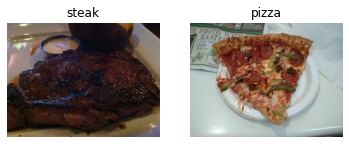

In [16]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_image = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_image = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [17]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather than look at all ~10.000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10.000 images (or more) might not fit into the memory of your processor (GPU).
2. Trying to learn the patterns in 10.000 images in one hit could result in the model not being able to learn very well.

Why 32?

Because 32 is good for your health... (Yann LeCun)

In [18]:
# Create train and test data generators and rescale the data
# Load in our image data from directories and turn them into batches
# Note: in the video Daniel is using ImageDataGenerator, but that has been deprecated since the video was recorded.
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

# Import data from directories and turn it into batches
scaling_layer = tf.keras.layers.Rescaling(1./255)
train_data = image_dataset_from_directory(directory=train_dir,
                                          batch_size=32,
                                          image_size=(224, 224),
                                          seed=42)
train_data = train_data.map(lambda x, y: (scaling_layer(x), y))
test_data = image_dataset_from_directory(directory=test_dir,
                                         batch_size=32,
                                         image_size=(224, 224),
                                         seed=42)
test_data = test_data.map(lambda x, y: (scaling_layer(x), y))


Found 1500 files belonging to 2 classes.
Found 500 files belonging to 2 classes.


In [19]:
# Get a sample of atrain data batch
iterator = train_data.as_numpy_iterator()
images, labels = iterator.next()
# Note: since the data set is not created as in the video the next batch is not fetched the same way here
# images, labels = train_data.batch()  # get the "next" batch of images/labels in train_data
len(images), len(labels)


(32, 32)

In [20]:
# How many batches are there?
len(train_data)

47

In [21]:
# Get the first two images and check the shape of the first image
images[:2], images[0].shape

(array([[[[4.20034289e-01, 2.18266070e-01, 6.46070987e-02],
          [4.25735325e-01, 2.23967120e-01, 7.03081265e-02],
          [4.04044151e-01, 2.09401280e-01, 6.52661100e-02],
          ...,
          [2.17713509e-02, 2.00629421e-02, 9.30717867e-03],
          [7.33046979e-03, 6.71524275e-03, 0.00000000e+00],
          [4.58801072e-03, 1.28925573e-02, 0.00000000e+00]],
 
         [[4.14301991e-01, 2.24298477e-01, 6.74357265e-02],
          [4.17174399e-01, 2.27170885e-01, 7.03081265e-02],
          [3.98225576e-01, 2.16450348e-01, 6.60351664e-02],
          ...,
          [1.25350133e-02, 8.99230782e-03, 4.68558539e-03],
          [2.27350253e-03, 9.11781739e-04, 0.00000000e+00],
          [3.40992957e-03, 1.53122051e-02, 4.30672243e-03]],
 
         [[4.03680235e-01, 2.30826095e-01, 6.80672303e-02],
          [4.08228308e-01, 2.37424970e-01, 7.36407191e-02],
          [4.00436461e-01, 2.27554783e-01, 7.46136084e-02],
          ...,
          [1.60189085e-02, 1.33052911e-03, 6.6526

In [22]:
# View the first batch of labels
labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1])

## 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep exeperimenting, you try to beat the baseline.

**Note:** In deep learning, there is almost an infinite amount of architechtures you could create. So one of the best ways to get started is to start with something simple and see if it works on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem, https://paperswithcode.com/sota).

In [23]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [24]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10,  # filter is the number of sliding windows going across an input (higher = more complex model)
           kernel_size=3,  # the size of the sliding window going across an input
           strides=1,  # the size of the step the sliding window takes across an input
           padding="valid",  # if "same", output shape is same as input shape, if "valid", output shape gets compressed
           activation="relu",
           input_shape=(224, 224, 3)),  # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")  # output layer (working with binary classification so only 1 output neuron)
])

**Practice:** Understand what's going on in a Conv2D layer by going through the CNN explainer website for 10-20 minutes: https://poloclub.github.io/cnn-explainer/

In [25]:
# Compile the model
model_4.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

### 4. Fit the model

In [26]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 16)

In [27]:
# Fit the model
history_4 = model_4.fit(train_data,  # this is the combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 17s 365ms/step - loss: 0.9645 - accuracy: 0.6867 - val_loss: 0.4623 - val_accuracy: 0.7860
Epoch 2/5
47/47 [==============================] - 17s 354ms/step - loss: 0.4516 - accuracy: 0.8007 - val_loss: 0.4154 - val_accuracy: 0.8300
Epoch 3/5
47/47 [==============================] - 17s 354ms/step - loss: 0.3306 - accuracy: 0.8713 - val_loss: 0.4043 - val_accuracy: 0.8080
Epoch 4/5
47/47 [==============================] - 17s 354ms/step - loss: 0.1479 - accuracy: 0.9533 - val_loss: 0.4375 - val_accuracy: 0.8080
Epoch 5/5
47/47 [==============================] - 17s 368ms/step - loss: 0.0563 - accuracy: 0.9847 - val_loss: 0.5922 - val_accuracy: 0.7920


### 5. Evaluating our model

It looks like our model is learning something, let's evaluate it.

<AxesSubplot:>

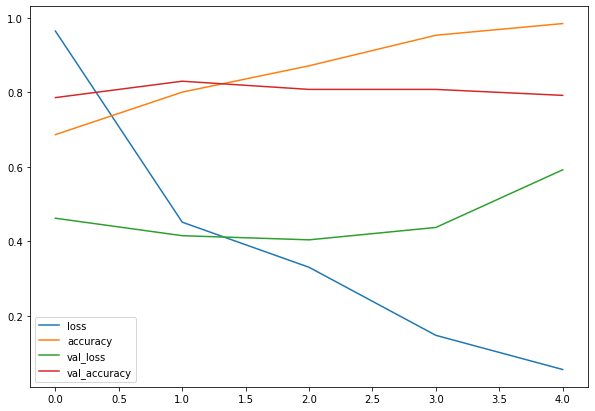

In [28]:
# let's plot the training curves
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10, 7))

In [29]:
# Plot the validation and training curves separately
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]

    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]

    epochs = range(len(history.history["loss"]))  # how many epochs did we run for?

    # Plot loss
    plt.plot(epochs, loss, label="training_loss")
    plt.plot(epochs, val_loss, label="val_loss")
    plt.title("loss")
    plt.xlabel("epochs")
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label="training_accuracy")
    plt.plot(epochs, val_accuracy, label="val_accuracy")
    plt.title("accuracy")
    plt.xlabel("epochs")
    plt.legend()

**Note:** When a model's **validation loss starts to increase**, it's likely that the model is **overfitting** the training dataset. This means, it's learning the patterns in the training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished.

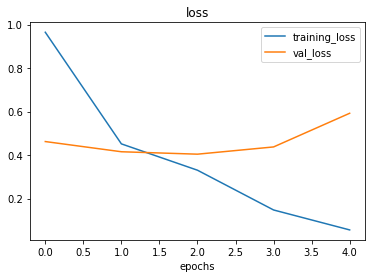

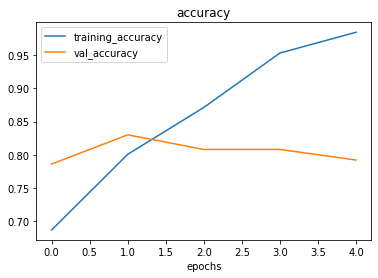

In [30]:
# Check out the loss and accuracy of model_4
plot_loss_curves(history_4)

**Note:** Ideally the two loss curves (training and validation) will be very similar to each other (training loss and validation loss decreasing at similar rates), when there are large differences your model may be **overfitting**.

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer

Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D)
* Add more data...

**Note:** Reducing overfitting is also known as **regularization**.

In [31]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [32]:
# Compile the model
model_5.compile(loss="binary_crossentropy", optimizer=Adam(), metrics=["accuracy"])

In [33]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 7s 133ms/step - loss: 0.6032 - accuracy: 0.6800 - val_loss: 0.5338 - val_accuracy: 0.7600
Epoch 2/5
47/47 [==============================] - 6s 133ms/step - loss: 0.4843 - accuracy: 0.7887 - val_loss: 0.4061 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 6s 133ms/step - loss: 0.4259 - accuracy: 0.8173 - val_loss: 0.3845 - val_accuracy: 0.8440
Epoch 4/5
47/47 [==============================] - 6s 133ms/step - loss: 0.4168 - accuracy: 0.8180 - val_loss: 0.3497 - val_accuracy: 0.8500
Epoch 5/5
47/47 [==============================] - 7s 136ms/step - loss: 0.3944 - accuracy: 0.8353 - val_loss: 0.3377 - val_accuracy: 0.8520


In [34]:
# Get a summary of our model with max pooling
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

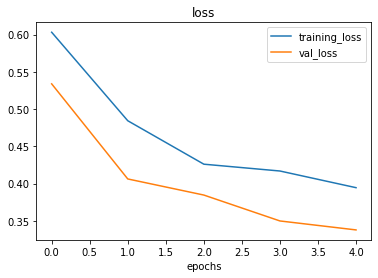

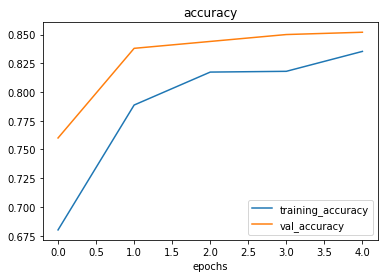

In [35]:
# Plot loss curves
plot_loss_curves(history_5)

### Opening our bag of tricks and finding data augmentation.

In [36]:
# Create ImageDataGenerator training instance with data augmentation


# from video
'''
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)
'''

from random import shuffle
tf.get_logger().setLevel('ERROR')  # just to suppres the warnings

scaling_layer = tf.keras.layers.Rescaling(1./255)
train_data_nonaug = image_dataset_from_directory(directory=train_dir,
                                                 batch_size=32,
                                                 image_size=(224, 224),
                                                 shuffle=False,
                                                 seed=42)
train_data_nonaug = train_data_nonaug.map(lambda x, y: (scaling_layer(x), y))

training_aug = Sequential([
    tf.keras.layers.Rescaling(scale=1./255),  # Should scaling be done outside this?
    tf.keras.layers.RandomRotation(0.2, fill_mode="nearest"),  # nearest is the default of ImageDataGenerator
    # shear doesn't exist
    tf.keras.layers.RandomZoom(0.2, fill_mode="nearest"),
    # tf.keras.layers.RandomWidth(0.2),  # RandomWidth will alter the shape of the image
    # tf.keras.layers.RandomHeight(0.3),  # RandomHeigth will alter the shape of the image
    # tf.keras.layers.RandomTranslation(0.3, 0.2, fill_mode="nearest", interpolation="nearest"),  # Not sure if using one translation or two is the best
    tf.keras.layers.RandomTranslation(0, 0.2, fill_mode="nearest", interpolation="nearest"),
    tf.keras.layers.RandomTranslation(0.3, 0, fill_mode="nearest", interpolation="nearest"),
    tf.keras.layers.RandomFlip("horizontal")
])

train_data_aug = image_dataset_from_directory(directory=train_dir,
                                              batch_size=32,
                                              image_size=(224, 224),
                                              shuffle=False,
                                              seed=42)
train_data_aug = train_data_aug.map(lambda x, y: (training_aug(x), y))

Found 1500 files belonging to 2 classes.
Found 1500 files belonging to 2 classes.


**Question:** What is data augmentation?

Data augmentation is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.

**Note:** Data augmentation is usually only performed on the training data. Images are left as they are in the directories but are modified as they're loaded into the model.

Let's write some code to visualize data augmentation...

In [37]:
# Get sample data batches
iterator = train_data_nonaug.as_numpy_iterator()
images, labels = iterator.next()
# Note: since the data set is not created as in the video the next batch is not fetched the same way here
# images, labels = train_data.batch()  # get the "next" batch of images/labels in train_data

iterator_aug = train_data_aug.as_numpy_iterator()
augmented_images, augmented_labels = iterator_aug.next()  # Note: labels aren't augmented... only data (images)

(224, 224, 3) (224, 224, 3)
showing image number: 31


(-0.5, 223.5, 223.5, -0.5)

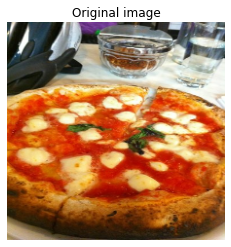

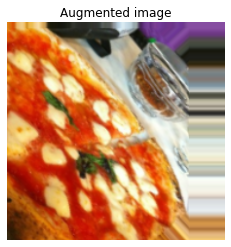

In [38]:
# Show original image and augmented image
import random
random_number = random.randint(0, 31)  # our batch sizes are 32...
print(images[random_number].shape, augmented_images[random_number].shape)
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title("Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title("Augmented image")
plt.axis(False)

Now we've seen what augmented training data looks like, let's build a model and see how it learns on augmented data.

In [39]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [40]:
# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [41]:
# Fit the model
history_6 = model_6.fit(train_data_aug,  # fitting model_6 on augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_aug),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 18s 381ms/step - loss: 2.3455 - accuracy: 0.6893 - val_loss: 0.8670 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 18s 385ms/step - loss: 0.7902 - accuracy: 0.3873 - val_loss: 0.7320 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 18s 383ms/step - loss: 0.7345 - accuracy: 0.2567 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 18s 379ms/step - loss: 0.6946 - accuracy: 0.2507 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 18s 376ms/step - loss: 0.6946 - accuracy: 0.2587 - val_loss: 0.6930 - val_accuracy: 0.5000


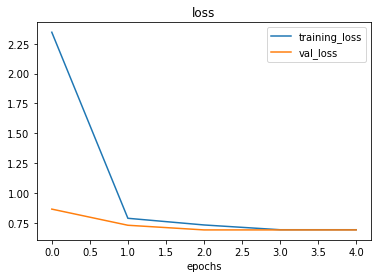

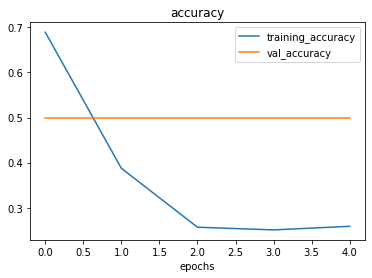

In [42]:
# Check our models training curves
plot_loss_curves(history_6)

Let's shuffle our augmented training data and train another model (the same as before) on it and see what happens.

In [43]:
# Import data from training directory and augment it and shuffle
train_data_aug_shuffled = image_dataset_from_directory(directory=train_dir,
                                                       batch_size=32,
                                                       image_size=(224, 224),
                                                       shuffle=True,
                                                       seed=42)
train_data_aug_shuffled = train_data_aug_shuffled.map(lambda x, y: (training_aug(x), y))

Found 1500 files belonging to 2 classes.


In [44]:
# Set random seed
tf.random.set_seed(42)

# Create the model (same as model_5 and model_6)
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [45]:
# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [46]:
# Fit the model
history_7 = model_7.fit(train_data_aug_shuffled,  # fitting model_7 on shuffled augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_aug_shuffled),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 19s 393ms/step - loss: 0.6753 - accuracy: 0.5640 - val_loss: 0.6638 - val_accuracy: 0.6040
Epoch 2/5
47/47 [==============================] - 18s 381ms/step - loss: 0.6079 - accuracy: 0.6627 - val_loss: 0.6567 - val_accuracy: 0.6080
Epoch 3/5
47/47 [==============================] - 18s 382ms/step - loss: 0.5289 - accuracy: 0.7480 - val_loss: 0.3785 - val_accuracy: 0.8580
Epoch 4/5
47/47 [==============================] - 18s 388ms/step - loss: 0.5003 - accuracy: 0.7527 - val_loss: 0.3711 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 18s 389ms/step - loss: 0.4999 - accuracy: 0.7560 - val_loss: 0.3229 - val_accuracy: 0.8760


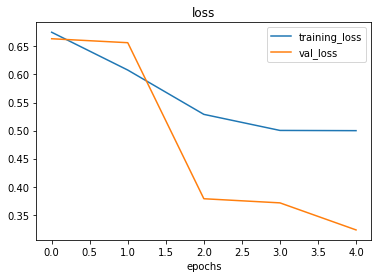

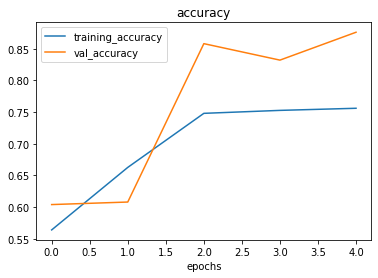

In [47]:
# Check our models training curves
plot_loss_curves(history_7)

**Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak).

### 7. Repeat until satisfied

Since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D`/`MaxPool2D` layers)
* Increase the number of filters in each convolutional layers (e.g. from 10 to 32 or even 64)
* Train for longer (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learnt and adjust it for our own use case

**Practice:** Recreate the model on the CNN explainer website (same as model_1) and see how it perfoms on the augmented shuffled training data. https://poloclub.github.io/cnn-explainer/

In [48]:
# Set random seed
tf.random.set_seed(42)

# Re-create the model
model_re = Sequential([
    Conv2D(filters=10, kernel_size=(3, 3), activation="relu", input_shape=(224, 224, 3)),
    Conv2D(filters=10, kernel_size=(3, 3), activation="relu"),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(filters=10, kernel_size=(3, 3), activation="relu"),
    Conv2D(filters=10, kernel_size=(3, 3), activation="relu"),
    MaxPool2D(pool_size=(2, 2)),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_re.compile(loss="binary_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

# Fit the model
history_re = model_re.fit(train_data_aug_shuffled,
                          epochs=10,
                          steps_per_epoch=len(train_data_aug_shuffled),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/10
47/47 [==============================] - 26s 549ms/step - loss: 0.6515 - accuracy: 0.5933 - val_loss: 0.5122 - val_accuracy: 0.7340
Epoch 2/10
47/47 [==============================] - 26s 560ms/step - loss: 0.5503 - accuracy: 0.7247 - val_loss: 0.4731 - val_accuracy: 0.8020
Epoch 3/10
47/47 [==============================] - 26s 555ms/step - loss: 0.5099 - accuracy: 0.7593 - val_loss: 0.4678 - val_accuracy: 0.7680
Epoch 4/10
47/47 [==============================] - 26s 550ms/step - loss: 0.5037 - accuracy: 0.7613 - val_loss: 0.3582 - val_accuracy: 0.8560
Epoch 5/10
47/47 [==============================] - 26s 552ms/step - loss: 0.4788 - accuracy: 0.7767 - val_loss: 0.3361 - val_accuracy: 0.8640
Epoch 6/10
47/47 [==============================] - 26s 562ms/step - loss: 0.4634 - accuracy: 0.7953 - val_loss: 0.3247 - val_accuracy: 0.8640
Epoch 7/10
47/47 [==============================] - 27s 574ms/step - loss: 0.4457 - accuracy: 0.8113 - val_loss: 0.3310 - val_accuracy: 0.8580

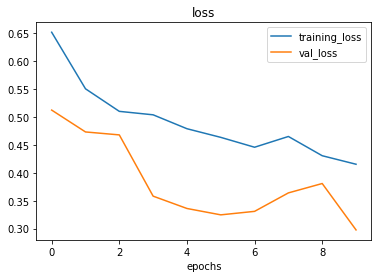

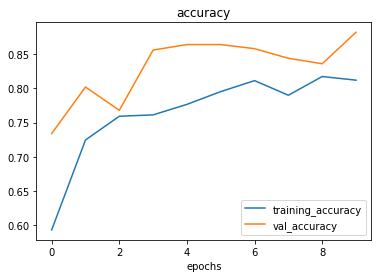

In [49]:
# Check our models training curves
plot_loss_curves(history_re)

## Making a prediction with our trained model on our own custom data

In [50]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


(-0.5, 3023.5, 4031.5, -0.5)

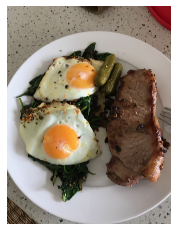

In [51]:
# View our example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import wget

# wget.download("https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg")
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False)




In [52]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

**Note:** When you train a neural network and you want to make a prediction with it on your own custom data, it's important that your custom data (or new data) is preprocessed into the same format as the data your model was trained on.

In [53]:
# Create a function to import an image and resize it to be able to be used withh our model
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, colour_channels).
    """
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the read file into a tensor
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image (get all values between 0 and 1)
    img = img/255.
    return img

In [54]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")

In [55]:
pred = model_7.predict(tf.expand_dims(steak, axis=0))
pred

1/1 [==============================] - 0s 46ms/step


array([[0.8458758]], dtype=float32)

Looks like our custom image is being put through our model, however, it currently outputs a prediction probability, wouldn't it be nice if we could visualize the image as well as the model's prediction?

In [56]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [57]:
# We can index the predicted class by rounding the prediction probablity and indexing it on the class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [58]:
from plistlib import load


def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a prediction with model
    and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    pred_class = class_names[int(tf.round(pred))]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

1/1 [==============================] - 0s 12ms/step


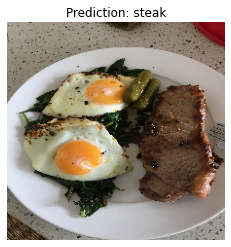

In [59]:
# Test our model on a custom image
pred_and_plot(model_7, "03-steak.jpeg")

Our model works! Let's try it on another image.. this time pizza

1/1 [==============================] - 0s 53ms/step


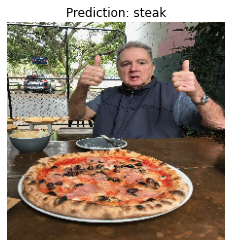

In [60]:
# Download another test custom image and make a prediction on it
# wget.download("https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg")
pred_and_plot(model_re, "03-pizza-dad.jpeg")  # model_7 predicted "steak"

# Multi-class Image Classification

We've just been through a bunch of the following steps with a binary classification problem (pizza vs. steak), now we're going to step things up a notch with 10 classes of food (multi-class classification).

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied


## 1. Import and become one with the data

In [61]:
import zipfile

# wget.download("https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip")

# Unzip our data
# zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
# zip_ref.extractall()
# zip_ref.close()

In [62]:
import os

# Walk through 10 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data\test'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_curry'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\chicken_wings'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\fried_rice'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\grilled_salmon'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\hamburger'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ice_cream'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\pizza'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\ramen'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\steak'.
There are 0 directories and 250 images in '10_food_classes_all_data\test\sushi'.
There are 

In [63]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [64]:
# Let's get the class names
import pathlib
import numpy as np

data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (512, 512, 3)


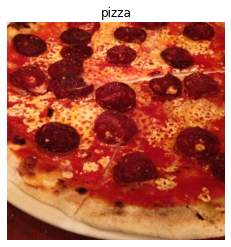

In [65]:
# Visualize, visualize, visualize
import random
img = view_random_image(target_dir=train_dir, target_class=random.choice(class_names))

## 2. Preprocess the data (prepare it for a model)

In [66]:
# Create train and test data generators and rescale the data
# Load in our image data from directories and turn them into batches
# Note: in the video Daniel is using ImageDataGenerator, but that has been deprecated since the video was recorded.
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory

# Import data from directories and turn it into batches
scaling_layer = tf.keras.layers.Rescaling(1./255)

train_data = image_dataset_from_directory(directory=train_dir,
                                          batch_size=32,
                                          image_size=(224, 224),
                                          seed=42,
                                          label_mode="categorical")
train_data = train_data.map(lambda x, y: (scaling_layer(x), y))

test_data = image_dataset_from_directory(directory=test_dir,
                                         batch_size=32,
                                         image_size=(224, 224),
                                         seed=42,
                                         label_mode="categorical")
test_data = test_data.map(lambda x, y: (scaling_layer(x), y))

Found 7500 files belonging to 10 classes.
Found 2500 files belonging to 10 classes.


## 3. Create a model (start with a baseline)

We've been talking a lot about the CNN explainer website... how about we just take their model (also on 10 classes) and use it for our problem...?

In [67]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Set random seed
tf.random.set_seed(42)

# Re-create the model
model_8 = Sequential([
    Conv2D(filters=10, kernel_size=(3, 3), activation="relu", input_shape=(224, 224, 3)),
    Conv2D(filters=10, kernel_size=(3, 3), activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=(3, 3), activation="relu"),
    Conv2D(filters=10, kernel_size=(3, 3), activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")  # Changed to have 10 output neurons and use the softmax activation function
])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

## 4. Fit a model

In [68]:
# Fit the model
history_8 = model_8.fit(train_data,  # Now 10 different classes
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 68s 286ms/step - loss: 2.0978 - accuracy: 0.2380 - val_loss: 1.9290 - val_accuracy: 0.3328
Epoch 2/5
235/235 [==============================] - 67s 286ms/step - loss: 1.8382 - accuracy: 0.3687 - val_loss: 1.8764 - val_accuracy: 0.3488
Epoch 3/5
235/235 [==============================] - 68s 288ms/step - loss: 1.4574 - accuracy: 0.5101 - val_loss: 1.9846 - val_accuracy: 0.3396
Epoch 4/5
235/235 [==============================] - 68s 288ms/step - loss: 0.8651 - accuracy: 0.7179 - val_loss: 2.6421 - val_accuracy: 0.3204
Epoch 5/5
235/235 [==============================] - 68s 290ms/step - loss: 0.3409 - accuracy: 0.8967 - val_loss: 3.7218 - val_accuracy: 0.3160


## 5. Evaluate the model

In [69]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 [==============================] - 4s 45ms/step - loss: 3.7218 - accuracy: 0.3160


[3.7218379974365234, 0.3160000145435333]

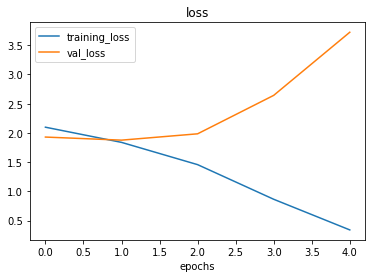

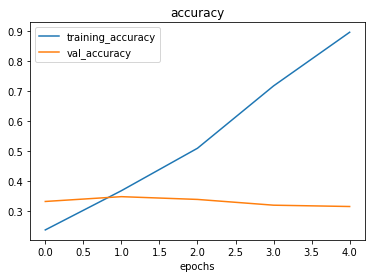

In [70]:
# Check out the model's loss curves on the 10 classes
plot_loss_curves(history_8)

What do these loss curves tell us?

Well... it seems our model is **overfitting** the training set quite badly... in other words, it's getting great results on the training data but fails to generalize well to unseen data and performs poorly on the test dataset.

## 6. Adjust the model hyperparameters (to beat the baseline/reduce overfitting)

Due to its performance on the training data, it's clear our model is learning something...

However, it's not generalizing well to unsee data (overfitting).

So, let's try and fix overfitting by...

* **Get more data** - having more data gives a model more opportunity to learn diverse patterns...
* **Simplify the model** - if our current model is overfitting the data, it may be too complicatedd of a model, one way to simplify a model is to: reduce # of layers or reduce # of hidden units in layers
* **Use data augmentation** - data augmentation manipulates the training data in such a way to add more diversity to it (without altering the original data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to your own and allows you to use those patterns on your own dataset

In [71]:
# How about we try and simplify the model first?
# Let's try to remove 2 convolutional layers...

# Set random seed
tf.random.set_seed(42)

# Re-create the model
model_9 = Sequential([
    Conv2D(filters=10, kernel_size=(3, 3), activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=(3, 3), activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

# Compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit the model
history_9 = model_9.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 30s 125ms/step - loss: 2.1184 - accuracy: 0.2373 - val_loss: 1.9446 - val_accuracy: 0.3220
Epoch 2/5
235/235 [==============================] - 30s 126ms/step - loss: 1.8017 - accuracy: 0.3863 - val_loss: 1.9120 - val_accuracy: 0.3316
Epoch 3/5
235/235 [==============================] - 29s 125ms/step - loss: 1.4545 - accuracy: 0.5221 - val_loss: 1.9229 - val_accuracy: 0.3564
Epoch 4/5
235/235 [==============================] - 30s 126ms/step - loss: 1.0044 - accuracy: 0.6835 - val_loss: 2.1133 - val_accuracy: 0.3164
Epoch 5/5
235/235 [==============================] - 29s 123ms/step - loss: 0.5607 - accuracy: 0.8423 - val_loss: 2.4934 - val_accuracy: 0.3204


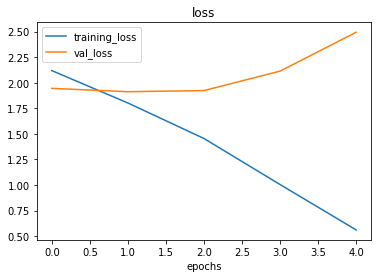

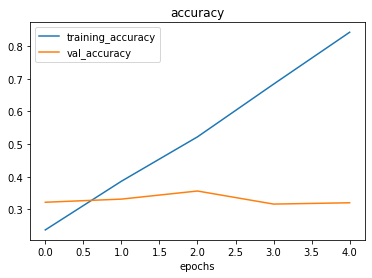

In [72]:
# Check out the loss curves of model_9
plot_loss_curves(history_9)

Looks like our "simplifying the model" experiment didn't work... the accuracy went down and overfitting continued...

How about we try data augmentation?

### Trying to reduce overfitting with data augmentation

Let's try and improve our model's results by using augmented training data...
Ideally, we want to:
* Reduce overfitting (get the train and validation loss curves closer)
* Improve validation accuracy

In [83]:
training_aug = Sequential([
    tf.keras.layers.Rescaling(scale=1./255),  # Should scaling be done outside this?
    tf.keras.layers.RandomRotation(0.2, fill_mode="nearest"),  # nearest is the default of ImageDataGenerator
    # shear doesn't exist
    tf.keras.layers.RandomZoom(0.2, fill_mode="nearest"),
    # tf.keras.layers.RandomTranslation(0.3, 0.2, fill_mode="nearest", interpolation="nearest"),  # Not sure if using one translation or two is the best
    tf.keras.layers.RandomTranslation(0, 0.2, fill_mode="nearest", interpolation="nearest"),
    tf.keras.layers.RandomTranslation(0.3, 0, fill_mode="nearest", interpolation="nearest"),
    tf.keras.layers.RandomFlip("horizontal")
])

train_data_aug = image_dataset_from_directory(directory=train_dir,
                                              batch_size=32,
                                              image_size=(224, 224),
                                              shuffle=True,
                                              seed=42,
                                              label_mode="categorical")

train_data_aug = train_data_aug.map(lambda x, y: (training_aug(x), y))

Found 7500 files belonging to 10 classes.


In [107]:
# Let's create another model but this time we'll fit it on the augmented training data of 10 classes

# Set random seed
tf.random.set_seed(42)

# Re-create the model
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (using the same setup as previous models)
model_10.compile(loss="categorical_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [108]:
# Fit the model
history_10 = model_10.fit(train_data_aug,
                          epochs=5,
                          steps_per_epoch=len(train_data_aug),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 119s 504ms/step - loss: 2.2758 - accuracy: 0.1285 - val_loss: 2.1720 - val_accuracy: 0.1824
Epoch 2/5
235/235 [==============================] - 116s 494ms/step - loss: 2.1739 - accuracy: 0.2053 - val_loss: 2.1011 - val_accuracy: 0.2496
Epoch 3/5
235/235 [==============================] - 117s 499ms/step - loss: 2.1205 - accuracy: 0.2377 - val_loss: 2.0009 - val_accuracy: 0.2804
Epoch 4/5
235/235 [==============================] - 116s 495ms/step - loss: 2.0605 - accuracy: 0.2633 - val_loss: 1.9209 - val_accuracy: 0.3260
Epoch 5/5
235/235 [==============================] - 116s 495ms/step - loss: 2.0328 - accuracy: 0.2788 - val_loss: 1.8734 - val_accuracy: 0.3468


In [109]:
model_8.evaluate(test_data)

79/79 [==============================] - 4s 46ms/step - loss: 3.7218 - accuracy: 0.3160


[3.7218379974365234, 0.3160000145435333]

In [110]:
model_10.evaluate(test_data)

79/79 [==============================] - 4s 46ms/step - loss: 1.8734 - accuracy: 0.3468


[1.8734216690063477, 0.3467999994754791]

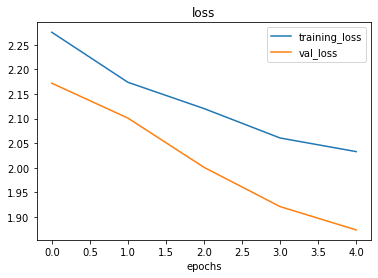

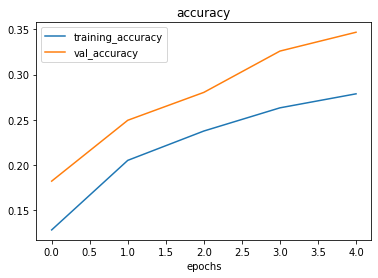

In [111]:
# Check out out model trained on augmented data's loss curves
plot_loss_curves(history_10)

Woah! That looks much better, the loss curves are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction) so if we were to trin for longer, we might see further improvements.

## 7. Repeat until satisfied

We could keep going here... continually trying to bring our loss curves closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments, namely:
- restructuring our model's architecture (increasing layers/hideen units)
- adjust the learning rate
- try different methods of data augmentation (adjust the hyperparameters in our ImageDataGenerator instance)
- training for longer (e.g. 10 epochs instead of 5 epochs)
- try **transfer learning**

### Making a prediction with our trained model

Let's use our trained model to make some predictions on our own custom images!

In [128]:
# Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [130]:
# Download some custom images
# wget.download("https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg")
# wget.download("https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg")
# wget.download("https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg")

'03-sushi.jpeg'

In [136]:
# Reconfig pred_and_plot function to work with multi-class images
def pred_and_plot(model, filename, class_names=class_names):
    """
    Imports an image located at filename, makes a prediction with model
    and plots the image with the predicted class as the title.
    """
    # Import the target image and preprocess it
    img = load_and_prep_image(filename)

    # Make a prediction
    pred = model.predict(tf.expand_dims(img, axis=0))

    # Get the predicted class
    # Add in logic for multi-class
    if len(pred[0]) > 1:
        pred_class = class_names[tf.argmax(pred[0])]
    else:
        pred_class = class_names[int(tf.round(pred[0]))]

    # Plot the image and predicted class
    plt.imshow(img)
    plt.title(f"Prediction: {pred_class}")
    plt.axis(False)

1/1 [==============================] - 0s 22ms/step


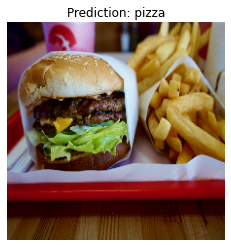

In [201]:
# Make a prediction
pred_and_plot(model_10, "03-hamburger.jpeg", class_names)

1/1 [==============================] - 0s 14ms/step


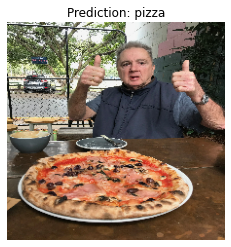

In [202]:
# Make a prediction
pred_and_plot(model_10, "03-pizza-dad.jpeg", class_names)

1/1 [==============================] - 0s 13ms/step


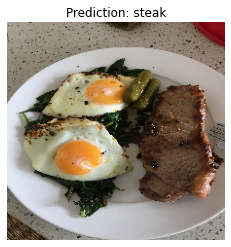

In [203]:
# Make a prediction
pred_and_plot(model_10, "03-steak.jpeg", class_names)

1/1 [==============================] - 0s 14ms/step


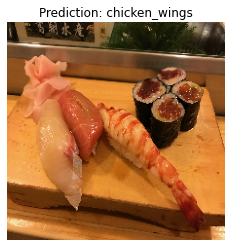

In [204]:
# Make a prediction
pred_and_plot(model_10, "03-sushi.jpeg", class_names)